# Course-4 : RESHAPING DATA WITH PANDAS


### Wide and Long Formats:

- **Wide Format:**
  In the wide format, data is organized with each variable in a separate column. This format is often more readable but may not be optimal for analysis or certain operations.

- **Long Format:**
  In the long format, data is organized with multiple rows representing the same entity, and different variables are stored in two or more columns (variable and value columns). This format is often more suitable for analysis and plotting.


In [2]:
import pandas as pd
import numpy as np

In [3]:
df =pd.read_csv("./DB/players_20.csv")
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


#### Wide format

- Each feature is in a separate column
- Each rows contains many features of the same player
- No repetition but large number of missing values
- Simple statistics and imputation


In [4]:

fifa_players = df[['short_name','age','nationality','club','height_cm','weight_kg','overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
# fifa_players = df[['short_name','age','nationality','club','height_cm','weight_kg','overall', 'dribbling'  ,'passing' , 'shooting']].head(6)
fifa_players = fifa_players.rename(columns={'short_name': 'name'})

fifa_players = df[['short_name', 'age', 'nationality', 'club', 'height_cm', 'weight_kg', 'overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
fifa_players = fifa_players.rename(columns={'short_name': 'name'})

# Filtering by specific clubs
desired_clubs = ['FC Barcelona', 'Real Madrid']
fifa_players = fifa_players[fifa_players['club'].isin(desired_clubs)].reset_index(drop=True).head(20)
fifa_players

,name,age,nationality,club,height_cm,weight_kg,overall,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,32,Argentina,FC Barcelona,170,72,94,87.0,92.0,92.0,96.0,39.0,66.0
1,E. Hazard,28,Belgium,Real Madrid,175,74,91,91.0,83.0,86.0,94.0,35.0,66.0
2,M. ter Stegen,27,Germany,FC Barcelona,187,85,90,NaN,NaN,NaN,NaN,NaN,NaN
3,L. Modrić,33,Croatia,Real Madrid,172,66,90,74.0,76.0,89.0,89.0,72.0,66.0
4,Sergio Ramos,33,Spain,Real Madrid,184,82,89,72.0,68.0,75.0,73.0,87.0,85.0
5,L. Suárez,32,Uruguay,FC Barcelona,182,86,89,73.0,89.0,80.0,84.0,51.0,84.0
6,Sergio Busquets,30,Spain,FC Barcelona,189,76,89,42.0,62.0,80.0,80.0,85.0,80.0
7,A. Griezmann,28,France,FC Barcelona,176,73,89,81.0,86.0,84.0,89.0,57.0,72.0
8,T. Courtois,27,Belgium,Real Madrid,199,96,88,NaN,NaN,NaN,NaN,NaN,NaN
9,Piqué,32,Spain,FC Barcelona,194,85,88,56.0,61.0,72.0,68.0,88.0,80.0


### Long format

- Each row represents one feature
- Multiple rows for each player
- A column ( `name` ) to identify same player
- Tidy data:
  - Better to summarize data
  - Key-value pairs
  - Preferred for analysis and graphing


In [5]:
fifa_players_long = pd.melt(fifa_players, id_vars=['name'], value_vars=['age', 'nationality', 'club', 'height_cm', 'weight_kg'],
                            var_name='attribute', value_name='value')

In [6]:
fifa_players_long

,name,attribute,value
0,L. Messi,age,32
1,E. Hazard,age,28
2,M. ter Stegen,age,27
3,L. Modrić,age,33
4,Sergio Ramos,age,33
...,...,...,...
95,S. Umtiti,weight_kg,75
96,Isco,weight_kg,79
97,I. Rakitić,weight_kg,78
98,F. de Jong,weight_kg,74


In [7]:
# Change the DataFrame so rows become columns and vice versa
fifa_players.set_index('club')[['name', 'nationality']].transpose() 

club,FC Barcelona,Real Madrid,FC Barcelona,Real Madrid,Real Madrid,FC Barcelona,FC Barcelona,FC Barcelona,Real Madrid,FC Barcelona,Real Madrid,Real Madrid,Real Madrid,FC Barcelona,Real Madrid,FC Barcelona,Real Madrid,FC Barcelona,FC Barcelona,Real Madrid
name,L. Messi,E. Hazard,M. ter Stegen,L. Modrić,Sergio Ramos,L. Suárez,Sergio Busquets,A. Griezmann,T. Courtois,Piqué,T. Kroos,Casemiro,K. Benzema,Jordi Alba,K. Navas,S. Umtiti,Isco,I. Rakitić,F. de Jong,R. Varane
nationality,Argentina,Belgium,Germany,Croatia,Spain,Uruguay,Spain,France,Belgium,Spain,Germany,Brazil,France,Spain,Costa Rica,France,Spain,Croatia,Netherlands,France


### Long to wide format

- Transform data using pandas methods, for example:
  - `.pivot()`
  - `.pivot_table()`


### Pivot method

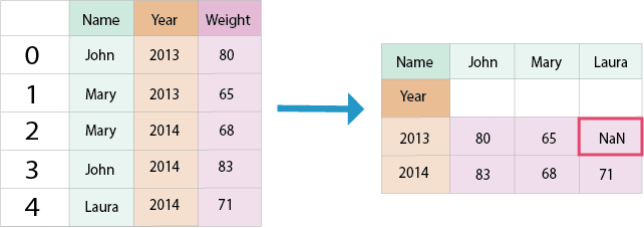
<br/>
<br/>

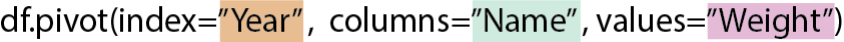


In [8]:
# Creating a pivot table
pd.pivot_table(fifa_players, index=['name'],
                             values=['overall', 'shooting', 'passing', 'dribbling'])



,dribbling,overall,passing,shooting
name,,,,
A. Griezmann,89.0,89,84.0,86.0
Casemiro,72.0,87,75.0,72.0
E. Hazard,94.0,91,86.0,83.0
F. de Jong,87.0,85,84.0,64.0
I. Rakitić,81.0,86,86.0,81.0
Isco,91.0,86,83.0,77.0
Jordi Alba,83.0,87,81.0,69.0
K. Benzema,86.0,87,80.0,82.0
K. Navas,NaN,87,NaN,NaN


In [9]:
# Creating a pivot table
pd.pivot_table(fifa_players, columns =['club'],
                             values=['overall', 'shooting', 'passing', 'dribbling'],aggfunc='max')



club,FC Barcelona,Real Madrid
dribbling,96.0,94.0
overall,94.0,91.0
passing,92.0,90.0
shooting,92.0,83.0


In [10]:
mean_age_fifa = fifa_players.pivot_table(index='nationality', 
                                     columns='club', 
                                     aggfunc='mean',values ='age').fillna(0)
mean_age_fifa.applymap('{:.1f}'.format)

club,FC Barcelona,Real Madrid
nationality,,
Argentina,32.0,0.0
Belgium,0.0,27.5
Brazil,0.0,27.0
Costa Rica,0.0,32.0
Croatia,31.0,33.0
France,26.5,28.5
Germany,27.0,29.0
Netherlands,22.0,0.0
Spain,30.7,30.0


In [11]:
players_country = fifa_players.pivot_table(index='nationality', 
                                            columns= 'club',
                                           margins=True,
                                           aggfunc='count', 
                                           values='name').fillna(0)

players_country.applymap('{:.0f}'.format)

club,FC Barcelona,Real Madrid,All
nationality,,,
Argentina,1,0,1
Belgium,0,2,2
Brazil,0,1,1
Costa Rica,0,1,1
Croatia,1,1,2
France,2,2,4
Germany,1,1,2
Netherlands,1,0,1
Spain,3,2,5


In [12]:
books_gothic = pd.read_csv("./DB/books.csv", on_bad_lines='skip').head(20).set_index('bookID')

books_gothic

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books


### Wide to long transformation

- Performed using pandas functions, such as:
  - `.melt()`
  - `.wide_to_long()`


In [13]:
gothic_melted_new = books_gothic.melt(id_vars=['title', 'authors', 'publisher']).head(15)
gothic_melted_new

,title,authors,publisher,variable,value
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,Scholastic Inc.,average_rating,4.57
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,Scholastic Inc.,average_rating,4.49
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,Scholastic,average_rating,4.42
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,Scholastic Inc.,average_rating,4.56
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,Scholastic,average_rating,4.78
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,Nimble Books,average_rating,3.74
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,Scholastic,average_rating,4.73
7,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,Gramercy Books,average_rating,4.38
8,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,Del Rey Books,average_rating,4.38
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,Crown,average_rating,4.22


Define a new DataFrame by melting the publisher column using the title and authors columns as identifier variables.


In [14]:
# Melt publisher column using title and authors as identifiers
publisher_melted = books_gothic.melt(id_vars=['title', 'authors'], 
                                     value_vars='publisher')

publisher_melted

,title,authors,variable,value
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,publisher,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,publisher,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,publisher,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,publisher,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,publisher,Scholastic
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,publisher,Nimble Books
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,publisher,Scholastic
7,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,publisher,Gramercy Books
8,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,publisher,Del Rey Books
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,publisher,Crown


In [15]:
# Assign the name feature to the new variable column
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], 
                                  value_vars=['average_rating', 'ratings_count'], 
                                  var_name='feature',value_name='number')

# Print books_ratings
books_ratings

,title,authors,publisher,feature,number
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,Scholastic Inc.,average_rating,4.57
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,Scholastic Inc.,average_rating,4.49
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,Scholastic,average_rating,4.42
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,Scholastic Inc.,average_rating,4.56
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,Scholastic,average_rating,4.78
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,Nimble Books,average_rating,3.74
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,Scholastic,average_rating,4.73
7,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,Gramercy Books,average_rating,4.38
8,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,Del Rey Books,average_rating,4.38
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,Crown,average_rating,4.22


##### Splitting into two columns


In [16]:
books_gothic[['main_title', 'subtitle']] = books_gothic['title'].str.split(":", expand=True) 
books_gothic[['main_title', 'subtitle']] 

,main_title,subtitle
bookID,,
1,Harry Potter and the Half-Blood Prince (Harry ...,None
2,Harry Potter and the Order of the Phoenix (Har...,None
4,Harry Potter and the Chamber of Secrets (Harry...,None
5,Harry Potter and the Prisoner of Azkaban (Harr...,None
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,None
9,Unauthorized Harry Potter Book Seven News,"""Half-Blood Prince"" Analysis and Speculation"
10,Harry Potter Collection (Harry Potter #1-6),None
12,The Ultimate Hitchhiker's Guide,Five Complete Novels and One Story (Hitchhike...
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,None


Explanation:

- `books_gothic['title'].str.split(":")`: This part splits each element in the 'title' column of the 'books_gothic' DataFrame into a list of substrings based on the colon (":") separator.

- `expand=True`: This parameter in the `str.split()` method is set to True to expand the result into a DataFrame with separate columns for each part of the split.

- `books_gothic[['main_title', 'subtitle']]`: This assigns the resulting DataFrame with two columns (main_title and subtitle) to the specified columns in the 'books_gothic' DataFrame.

Here's an example with a hypothetical DataFrame:

```python
import pandas as pd

# Sample DataFrame
data = {'title': ['Book1: Chapter One', 'Book2: The Dark Tale', 'Book3: Mystery']}
books_gothic = pd.DataFrame(data)

# Splitting the 'title' column
books_gothic[['main_title', 'subtitle']] = books_gothic['title'].str.split(":", expand=True)

# Displaying the result
print(books_gothic[['main_title', 'subtitle']])
```

Result:

```
  main_title       subtitle
0     Book1   Chapter One
1     Book2   The Dark Tale
2     Book3        Mystery
```


In [17]:
books_gothic.authors

bookID
1     J.K. Rowling/Mary GrandPré
2     J.K. Rowling/Mary GrandPré
4                   J.K. Rowling
5     J.K. Rowling/Mary GrandPré
8     J.K. Rowling/Mary GrandPré
9         W. Frederick Zimmerman
10                  J.K. Rowling
12                 Douglas Adams
13                 Douglas Adams
14                 Douglas Adams
16     Douglas Adams/Stephen Fry
18                 Douglas Adams
21                   Bill Bryson
22                   Bill Bryson
23                   Bill Bryson
24                   Bill Bryson
25                   Bill Bryson
26                   Bill Bryson
27                   Bill Bryson
28                   Bill Bryson
Name: authors, dtype: object

In [19]:
books_gothic[['writer', 'illustrator']] = books_gothic['authors'].str.split('/',expand=True)

books_gothic

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,main_title,subtitle,writer,illustrator
bookID,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Harry Potter and the Half-Blood Prince (Harry ...,None,J.K. Rowling,Mary GrandPré
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Harry Potter and the Order of the Phoenix (Har...,None,J.K. Rowling,Mary GrandPré
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,None
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Harry Potter and the Prisoner of Azkaban (Harr...,None,J.K. Rowling,Mary GrandPré
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Harry Potter Boxed Set Books 1-5 (Harry Potte...,None,J.K. Rowling,Mary GrandPré
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,Unauthorized Harry Potter Book Seven News,"""Half-Blood Prince"" Analysis and Speculation",W. Frederick Zimmerman,None
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,Harry Potter Collection (Harry Potter #1-6),None,J.K. Rowling,None
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books,The Ultimate Hitchhiker's Guide,Five Complete Novels and One Story (Hitchhike...,Douglas Adams,None
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books,The Ultimate Hitchhiker's Guide to the Galaxy ...,None,Douglas Adams,None
